<a href="https://colab.research.google.com/github/Sirikanya-09/Stat2/blob/main/660510776_lab05_decision_tree_bagging_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=12)

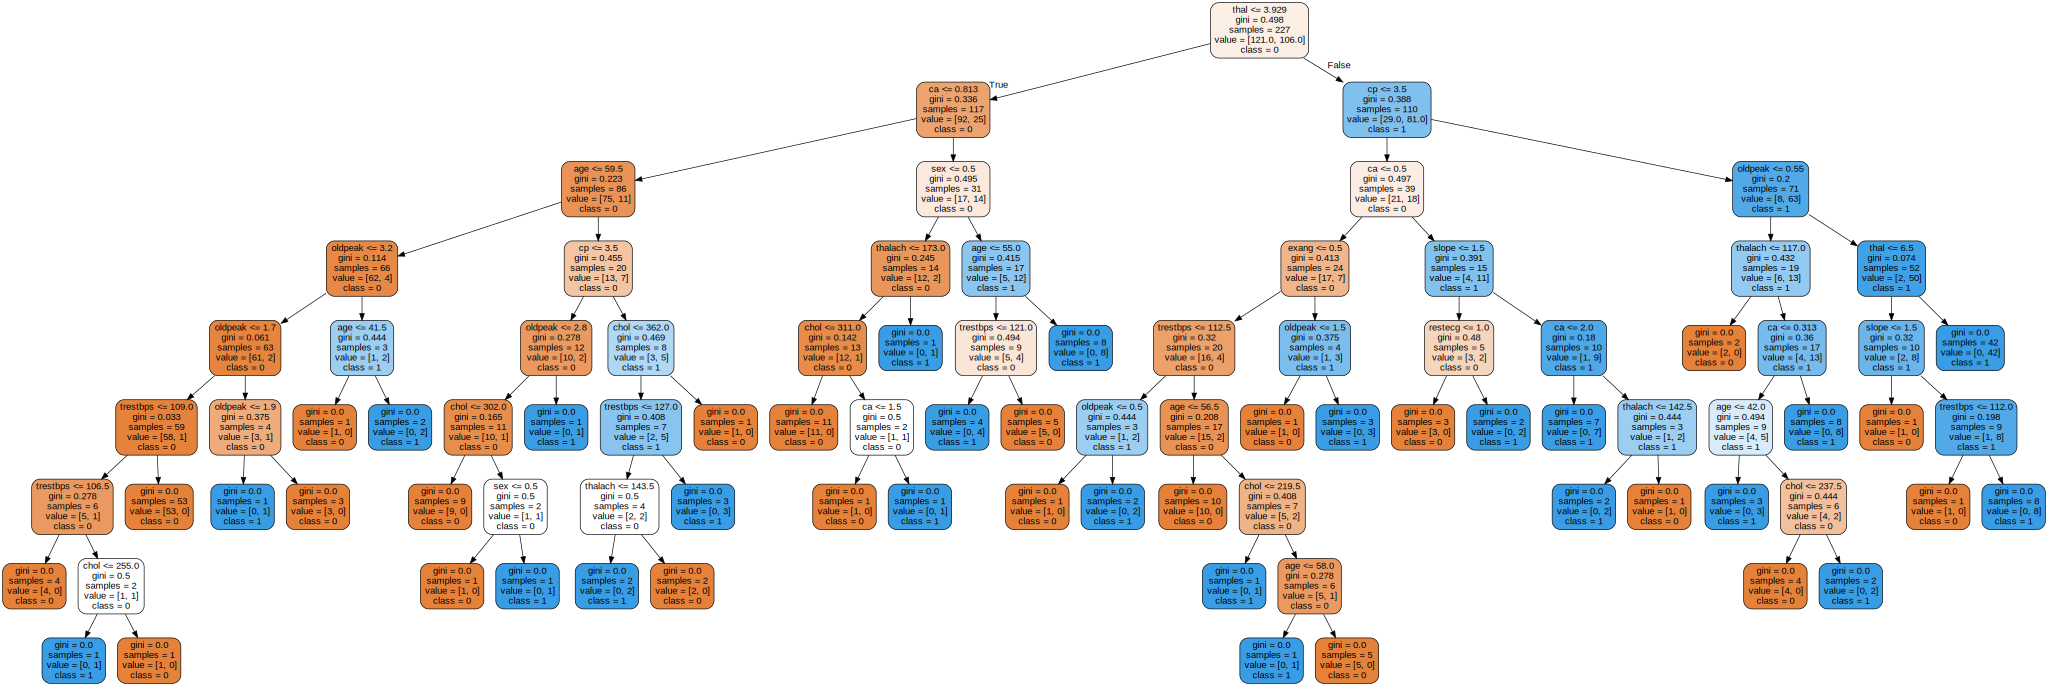

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

# แบ่งข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
def run_model(name, pipeline, param_grid):
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print("Best Params:", grid.best_params_)
    print("F1 Macro:", f1)
    print("Accuracy:", acc)
    return grid, f1, acc


In [ ]:
dt_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(random_state=42))
])

dt_params = {
    "clf__max_depth": [3, 5, 10],
    "clf__min_samples_split": [2, 5, 10],
    "clf__criterion": ["gini", "entropy"]
}

dt_model, dt_f1, dt_acc = run_model("Decision Tree", dt_pipe, dt_params)



Decision Tree
Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_split': 2}
F1 Macro: 0.8356681034482758
Accuracy: 0.8360655737704918


In [ ]:
bag_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42))
])

bag_params = {
    "clf__n_estimators": [10, 50, 100],
    "clf__max_samples": [0.5, 0.7, 1.0],
    "clf__estimator__max_depth": [3, 5, None]
}

bag_model, bag_f1, bag_acc = run_model("Bagging Tree", bag_pipe, bag_params)


Bagging Tree
Best Params: {'clf__estimator__max_depth': 5, 'clf__max_samples': 0.7, 'clf__n_estimators': 100}
F1 Macro: 0.8688172043010753
Accuracy: 0.8688524590163934


In [ ]:
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=42))
])

rf_params = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [5, 10, None],
    "clf__min_samples_split": [2, 5, 10]
}

rf_model, rf_f1, rf_acc = run_model("Random Forest", rf_pipe, rf_params)


Random Forest
Best Params: {'clf__max_depth': 5, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}
F1 Macro: 0.8852459016393442
Accuracy: 0.8852459016393442


In [ ]:
models = {
    "Decision Tree": dt_f1,
    "Bagging Tree": bag_f1,
    "Random Forest": rf_f1
}

best_name = max(models, key=models.get)
print(f"\n🏆 Best Model: {best_name} (F1 Macro = {models[best_name]:.4f})")

if best_name == "Decision Tree":
    best_dt = dt_model.best_estimator_.named_steps["clf"]
    plt.figure(figsize=(15, 6))
    plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=["0", "1"])
    plt.title("Best Decision Tree")
    plt.show()



🏆 Best Model: Random Forest (F1 Macro = 0.8852)


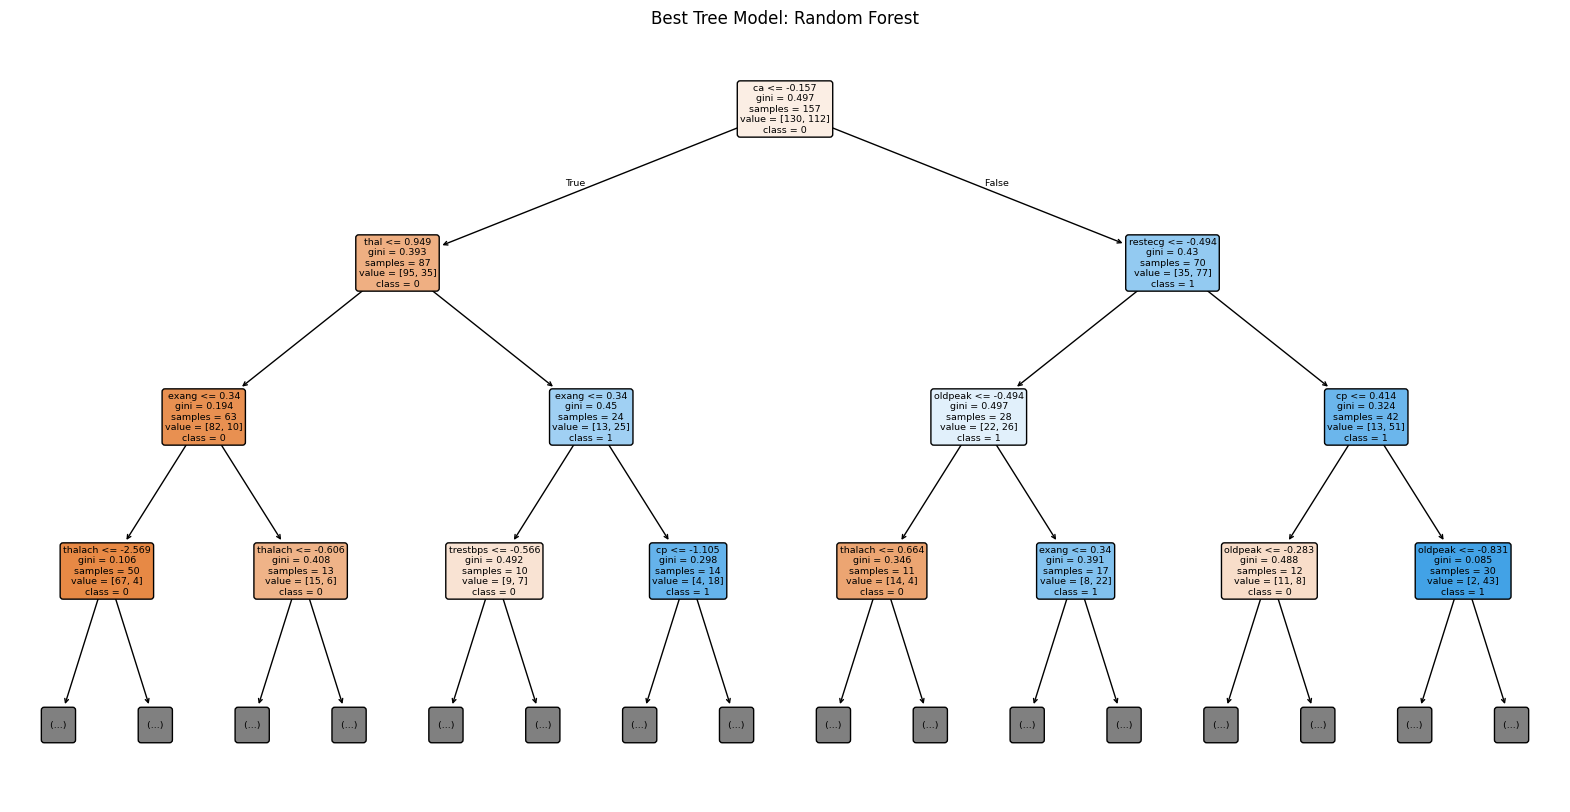

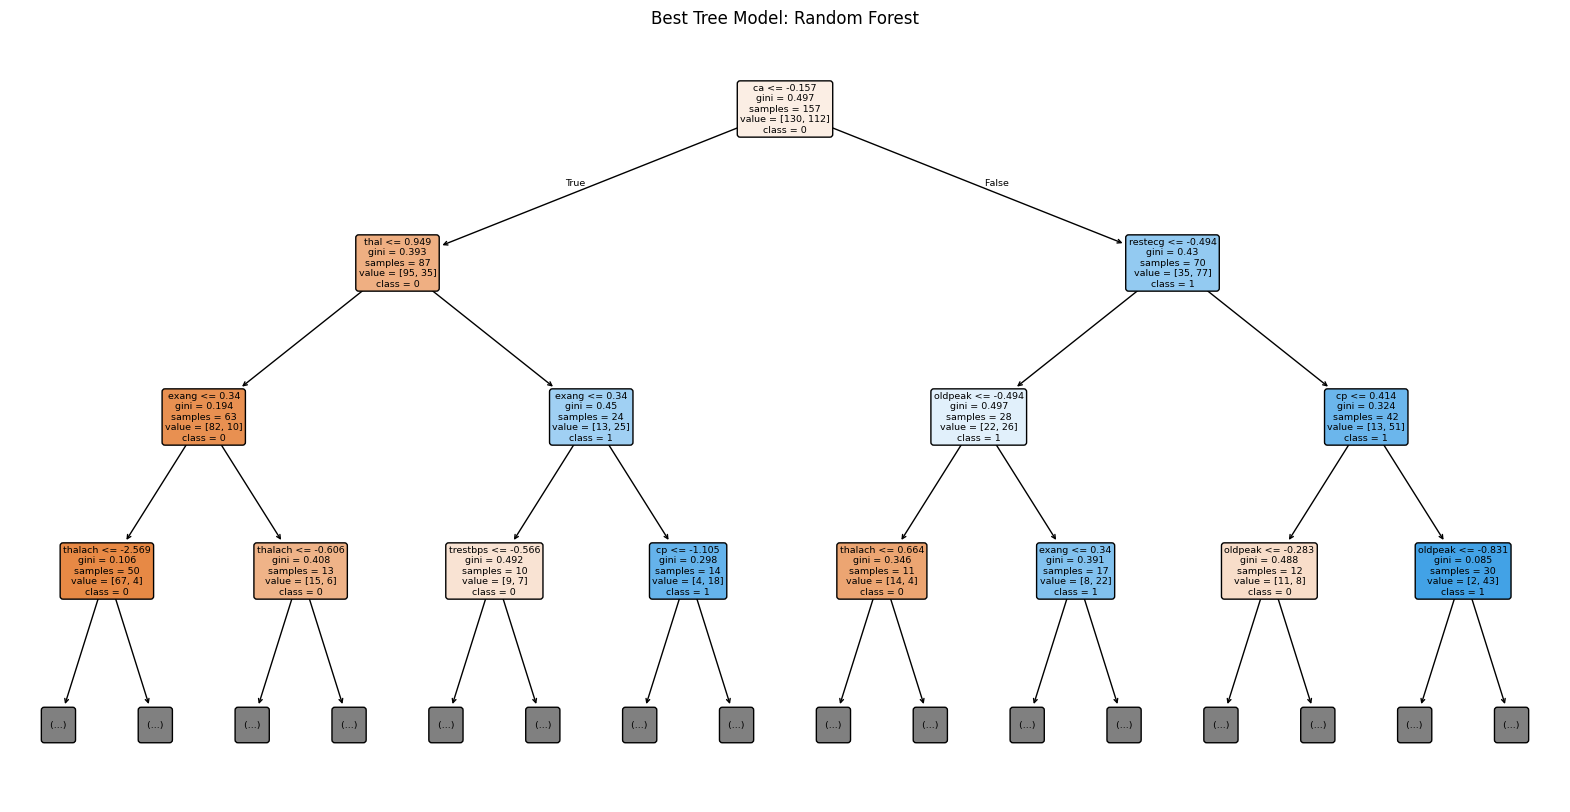

In [ ]:
# ตรวจสอบว่า best model คือ Random Forest หรือไม่
if best_name == "Random Forest":
    # ดึง random forest classifier ที่ดีที่สุด
    best_rf = rf_model.best_estimator_.named_steps["clf"]

    # เลือก tree ตัวใดตัวหนึ่งจากใน random forest (เช่น ตัวแรก)
    best_tree = best_rf.estimators_[0]

    # วาด tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        best_tree,
        filled=True,
        feature_names=X.columns,
        class_names=[str(cls) for cls in best_rf.classes_],
        rounded=True,
        max_depth=3  # เปลี่ยนได้ถ้าอยากดูลึก
    )
    plt.title("Best Tree Model: Random Forest")
    plt.show()

if best_name == "Decision Tree":
    best_dt = dt_model.best_estimator_.named_steps["clf"]
    plt.figure(figsize=(15, 6))
    plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=["0", "1"])
    plt.title("Best Decision Tree")
    plt.show()

if best_name == "Decision Tree":
    best_dt = dt_model.best_estimator_.named_steps["clf"]
    plt.figure(figsize=(15, 6))
    plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=["0", "1"])
    plt.title("Best Decision Tree")
    plt.show()

elif best_name == "Random Forest":
    best_rf = rf_model.best_estimator_.named_steps["clf"]
    best_tree = best_rf.estimators_[0]
    plt.figure(figsize=(20, 10))
    plot_tree(
        best_tree,
        filled=True,
        feature_names=X.columns,
        class_names=[str(cls) for cls in best_rf.classes_],
        rounded=True,
        max_depth=3
    )
    plt.title("Best Tree Model: Random Forest")
    plt.show()

